# K-Mean Clustering (Unsupervised Learning)
Asad Ahmed
---


1. Importing libraries

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

2. Opening images and Converting into into grayscale

In [2]:
# opening image & converting into grayscale
b_image = Image.open('flood.jpg').convert('L') 
a_image = Image.open('afterflood.jpg').convert('L')

3. Convert

In [3]:
# Convert PIL Image to numpy array
b_image_np = np.array(b_image)
a_image_np = np.array(a_image)

# Reshape the image into 1D array
b_image_1d = b_image_np.reshape(-1,1)
a_image_1d = a_image_np.reshape(-1,1)

In [4]:
# checking shape of image_np & image_1d
print("Before Flood Shape : ", b_image_np.shape, b_image_1d.shape)
print("After Flood Shape: ", a_image_np.shape, a_image_1d.shape)

Before Flood Shape :  (479, 639) (306081, 1)
After Flood Shape:  (479, 639) (306081, 1)


In [5]:
# K-Means Clustering
n = 4
kmeans = KMeans(n_clusters=n)
cluster_b = kmeans.fit_predict(b_image_1d)
cluster_a = kmeans.fit_predict(a_image_1d)

c:\Users\asad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\asad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
# checking shape of cluster assignment
print("Shape of cluster assignment: ", cluster_b.shape, cluster_a.shape)

Shape of cluster assignment:  (306081,) (306081,)


In [7]:
clustered_image_b = cluster_b.reshape(b_image_np.shape)
clustered_image_a = cluster_a.reshape(a_image_np.shape)

In [8]:
clustered_image_b.shape, clustered_image_a.shape

((479, 639), (479, 639))

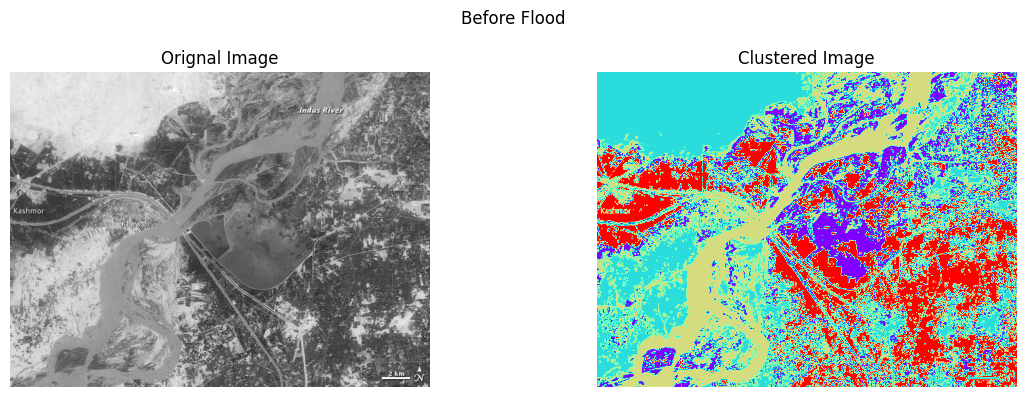

In [9]:
# plotting
plt.figure(figsize=(12,4))
plt.suptitle('Before Flood', fontsize=12)
plt.subplot(121)
plt.imshow(b_image_np, cmap='gray')
plt.title('Orignal Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(clustered_image_b, cmap='rainbow')
plt.title('Clustered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

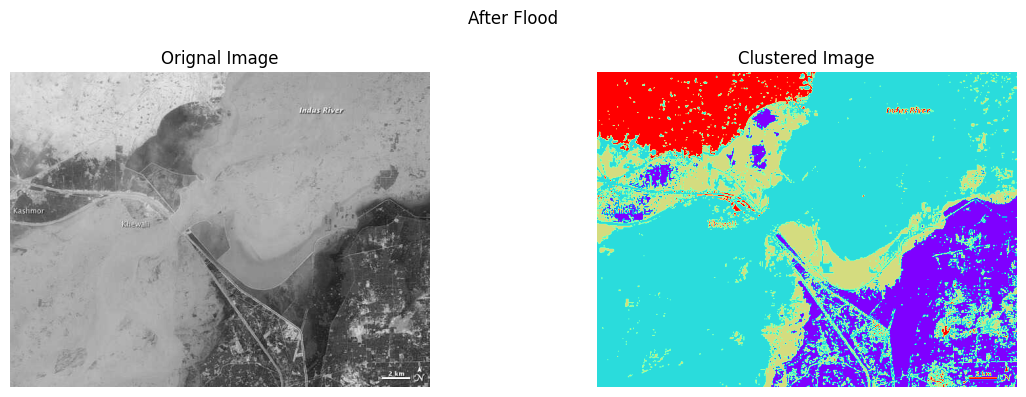

In [10]:
# plotting
plt.figure(figsize=(12,4))
plt.suptitle('After Flood', fontsize=12)

plt.subplot(121)
plt.imshow(a_image_np, cmap='gray')
plt.title('Orignal Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(clustered_image_a, cmap='rainbow')
plt.title('Clustered Image')
plt.axis('off')


plt.tight_layout()
plt.show()

In [11]:
# Creating masks for above image using loop that depends on
b_masks = [] 
a_masks = []
for cluster_id in range(n):
    cluster_mask = (cluster_b == cluster_id).reshape(b_image_np.shape)
    b_masks.append(cluster_mask)
    cluster_mask = (cluster_a == cluster_id).reshape(a_image_np.shape)
    a_masks.append(cluster_mask)

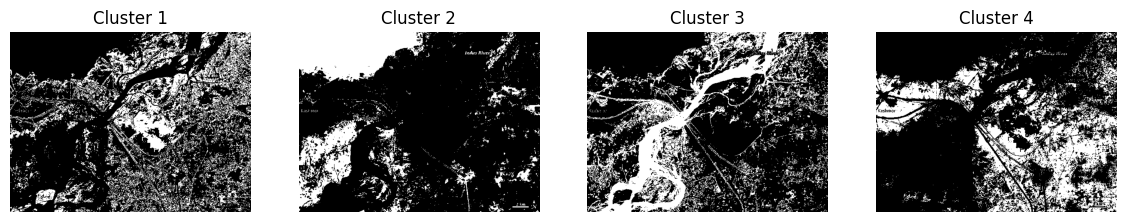

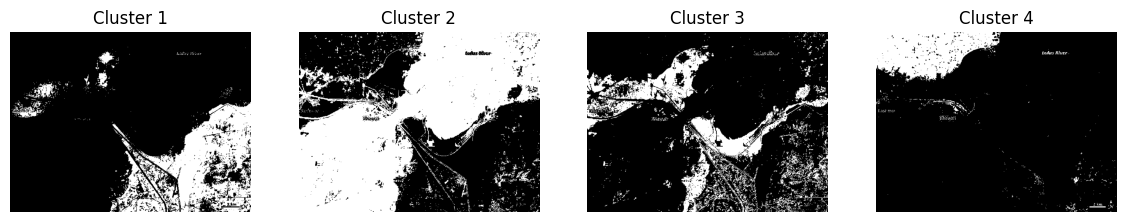

In [22]:
# plotting different masks using loop
plt.figure(figsize=(18,12))
for i in range(n):
    plt.subplot(1, n+1, i+1)
    plt.imshow(b_masks[i], cmap='gray')
    plt.title('Cluster ' + str(i+1))
    plt.axis('off')

plt.figure(figsize=(18,12))
for i in range(n):
    plt.subplot(1, n+1, i+1)
    plt.imshow(a_masks[i], cmap='gray')
    plt.title('Cluster ' + str(i+1))
    plt.axis('off')

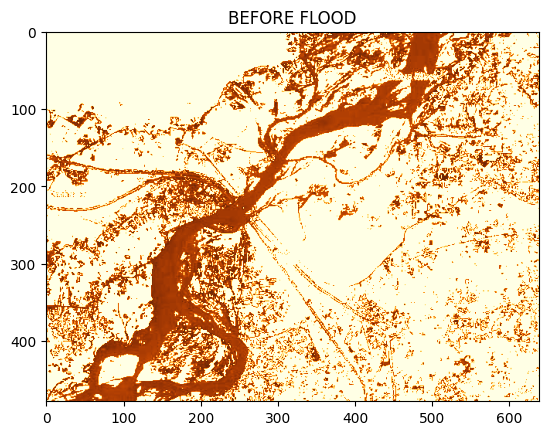

In [27]:
# show  both  masked image
b_flood = b_image_np*b_masks[2]
plt.title('BEFORE FLOOD')
plt.imshow(b_flood, cmap='YlOrBr')

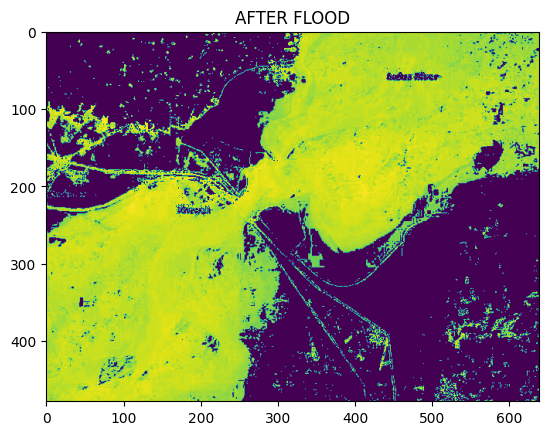

In [28]:
a_flood = a_image_np*a_masks[1]
plt.title('AFTER FLOOD')
plt.imshow(a_flood)

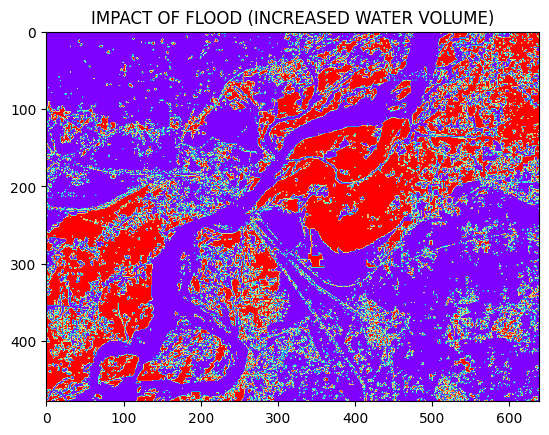

In [29]:
difference = a_masks[1] ^ b_masks[2]
plt.title('IMPACT OF FLOOD (INCREASED WATER VOLUME)')
plt.imshow(difference, cmap='rainbow')

---
The End.
